<a href="https://colab.research.google.com/github/itsananyaa/Crime-analysis-and-prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The required libraries

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Importing the CSV file

In [ ]:
dataset=pd.read_csv('/content/Crime.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159632 entries, 0 to 159631
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Incident ID           159632 non-null  int64  
 1   Dispatch Date / Time  92112 non-null   object 
 2   Victims               159631 non-null  float64
 3   Crime Name1           159517 non-null  object 
 4   Crime Name3           159517 non-null  object 
 5   Police District Name  159631 non-null  object 
 6   Block Address         143191 non-null  object 
 7   Place                 159631 non-null  object 
 8   Sector                159586 non-null  object 
 9   Street Name           159631 non-null  object 
 10  Start_Date_Time       159631 non-null  object 
 11  End_Date_Time         76163 non-null   object 
 12  Latitude              159631 non-null  float64
 13  Longitude             159631 non-null  float64
 14  Location              159631 non-null  object 
dtype

Checking the shape of dataset


In [ ]:
print('Dataset shape :', dataset.shape)
dataset.head()

Dataset shape : (159632, 15)


,Incident ID,Dispatch Date / Time,Victims,Crime Name1,Crime Name3,Police District Name,Block Address,Place,Sector,Street Name,Start_Date_Time,End_Date_Time,Latitude,Longitude,Location
0,201223224,1/16/2019 15:51,1.0,Crime Against Property,LARCENY - SHOPLIFTING,WHEATON,11100 BLK VEIRS MILL RD,Retail - Department/Discount Store,L,VEIRS MILL,1/16/2019 15:51,NaN,39.037367,-77.051662,"(39.0374, -77.0517)"
1,201224613,1/27/2019 18:05,1.0,Crime Against Property,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,400 BLK GIRARD ST,Residence - Apartment/Condo,P,GIRARD,1/27/2019 18:05,NaN,39.146531,-77.184940,"(39.1465, -77.1849)"
2,201267200,11/28/2019 6:08,1.0,Crime Against Person,RAPE - STRONG-ARM,WHEATON,10900 BLK GEORGIA AVE,Residence - Apartment/Condo,L,GEORGIA,11/28/2019 6:08,NaN,39.034255,-77.049163,"(39.0343, -77.0492)"
3,201230900,3/15/2019 10:53,2.0,Crime Against Person,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,700 BLK QUINCE ORCHARD BLV,Street - Residential,P,QUINCE ORCHARD,3/15/2019 10:50,3/15/2019 10:55,39.141812,-77.224489,"(39.1418, -77.2245)"
4,201265312,11/15/2019 15:31,1.0,Crime Against Person,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,NaN,Street - Residential,R,MIDCOUNTY,11/15/2019 15:20,NaN,39.159339,-77.198516,"(39.1593, -77.1985)"


Checking for null values

In [ ]:
dataset.isnull().sum()

Incident ID                 0
Dispatch Date / Time    67520
Victims                     1
Crime Name1               115
Crime Name3               115
Police District Name        1
Block Address           16441
Place                       1
Sector                     46
Street Name                 1
Start_Date_Time             1
End_Date_Time           83469
Latitude                    1
Longitude                   1
Location                    1
dtype: int64

#Data Cleansing

Getting to know what we have in our data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159632 entries, 0 to 159631
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Incident ID           159632 non-null  int64  
 1   Dispatch Date / Time  92112 non-null   object 
 2   Victims               159631 non-null  float64
 3   Crime Name1           159517 non-null  object 
 4   Crime Name3           159517 non-null  object 
 5   Police District Name  159631 non-null  object 
 6   Block Address         143191 non-null  object 
 7   Place                 159631 non-null  object 
 8   Sector                159586 non-null  object 
 9   Street Name           159631 non-null  object 
 10  Start_Date_Time       159631 non-null  object 
 11  End_Date_Time         76163 non-null   object 
 12  Latitude              159631 non-null  float64
 13  Longitude             159631 non-null  float64
 14  Location              159631 non-null  object 
dtype

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159632 entries, 0 to 159631
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Incident ID           159632 non-null  int64  
 1   Dispatch Date / Time  92112 non-null   object 
 2   Victims               159631 non-null  float64
 3   Crime Name1           159517 non-null  object 
 4   Crime Name3           159517 non-null  object 
 5   Police District Name  159631 non-null  object 
 6   Block Address         143191 non-null  object 
 7   Place                 159631 non-null  object 
 8   Sector                159586 non-null  object 
 9   Street Name           159631 non-null  object 
 10  Start_Date_Time       159631 non-null  object 
 11  End_Date_Time         76163 non-null   object 
 12  Latitude              159631 non-null  float64
 13  Longitude             159631 non-null  float64
 14  Location              159631 non-null  object 
dtype

#Analysis

#Checking for any problematic data

In [ ]:

dataset['Start_Date_Time'] = pd.to_datetime(dataset['Start_Date_Time'], errors='coerce')

# Find rows with problematic datetime values
problematic_rows = dataset[dataset['Start_Date_Time'].isna()]
dataset['Start_Date_Time'] = pd.to_datetime(dataset['Start_Date_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dataset.dropna(subset=['Start_Date_Time'], inplace=True)


#Seperating the components of datetime

In [ ]:
import datetime

dataset['Start_Date_Time'] = pd.to_datetime(dataset['Start_Date_Time'])

# Extracting date components
dataset['Month'] = dataset['Start_Date_Time'].dt.month
dataset['Day'] = dataset['Start_Date_Time'].dt.day
dataset['Year'] = dataset['Start_Date_Time'].dt.year
dataset['Weekday'] = dataset['Start_Date_Time'].dt.weekday

# Extracting time components
dataset['Hour'] = dataset['Start_Date_Time'].dt.hour

# Adjusting for AM/PM
dataset.loc[(dataset['Start_Date_Time'].dt.strftime('%p') == 'PM') & (dataset['Hour'] != 12), 'Hour'] += 12
dataset.loc[(dataset['Start_Date_Time'].dt.strftime('%p') == 'AM') & (dataset['Hour'] == 12), 'Hour'] = 0


#Data Analysis

Getting to know what columns we got

In [ ]:
print('Data Features:\n',dataset.columns.values)

Data Features:
 ['Incident ID' 'Dispatch Date / Time' 'Victims' 'Crime Name1'
 'Crime Name3' 'Police District Name' 'Block Address' 'Place' 'Sector'
 'Street Name' 'Start_Date_Time' 'End_Date_Time' 'Latitude' 'Longitude'
 'Location' 'Month' 'Day' 'Year' 'Weekday' 'Hour']


#Data visualisation

*Distribution of crime each year*

Below we can see the distribution of crime in each year between 2016 and 2020.

In [ ]:
import plotly.express as px

yearly_counts = dataset['Year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Number of Crimes']

fig = px.bar(yearly_counts, x='Year', y='Number of Crimes',
             title='Yearly Crime Distribution',
             labels={'Year': 'Year', 'Number of Crimes': 'Number of Crimes'},
             text='Number of Crimes')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Crimes')
fig.update_layout(showlegend=False, coloraxis_showscale=False)
fig.show()


Distributing the week days into sub plots for better analysis

In [ ]:
def plotWeek(data,title,w = None, h = None):
    weekdays = [dataset[dataset['Weekday']==i] for i in range(7)]

    week_hr = []
    for day in weekdays:
        hrs = []
        for i in range(24):
            hrs.append(len(day[day['Hour']==i]))
        week_hr.append(hrs)
        fig = make_subplots(rows=3, cols=3,
                       subplot_titles=('','Monday','','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

    fig.add_trace(go.Bar(y=week_hr[0]), row=1, col = 2)
    fig.add_trace(go.Bar(y=week_hr[1]), row=2, col = 1)
    fig.add_trace(go.Bar(y=week_hr[2]), row=2, col = 2)
    fig.add_trace(go.Bar(y=week_hr[3]), row=2, col = 3)
    fig.add_trace(go.Bar(y=week_hr[4]), row=3, col = 1)
    fig.add_trace(go.Bar(y=week_hr[5]), row=3, col = 2)
    fig.add_trace(go.Bar(y=week_hr[6]), row=3, col = 3)

    fig.update_layout(title_text=title,showlegend=False, width = w, height = h)
    return fig

#Analysis based on each year

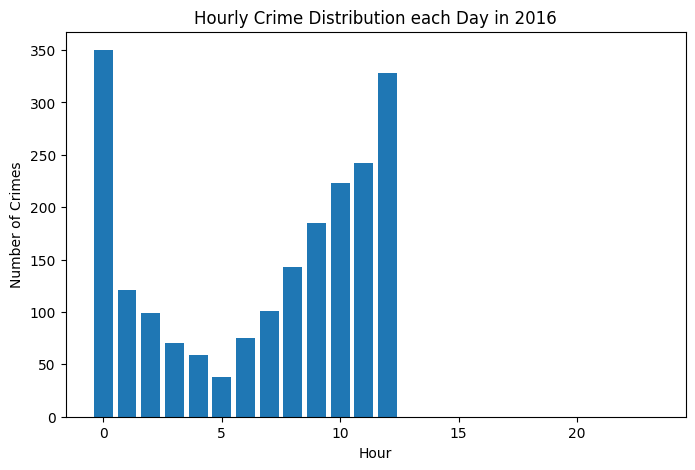

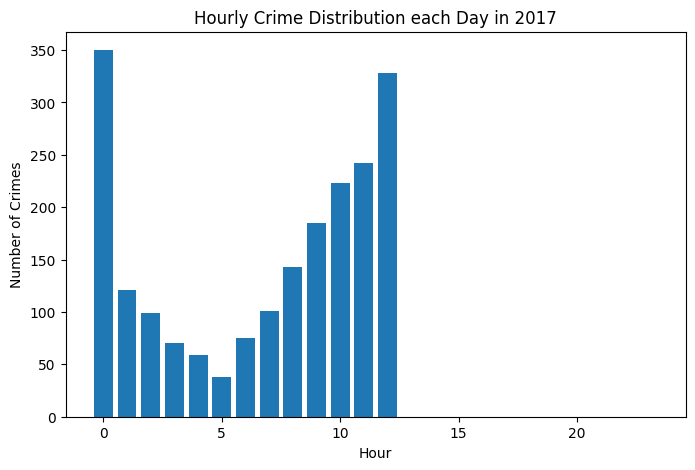

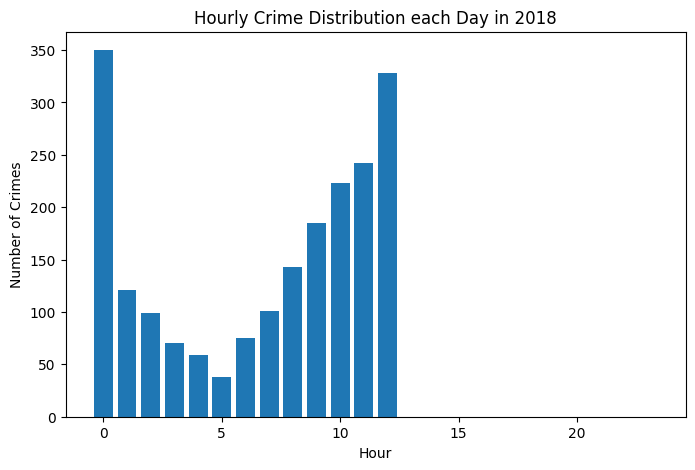

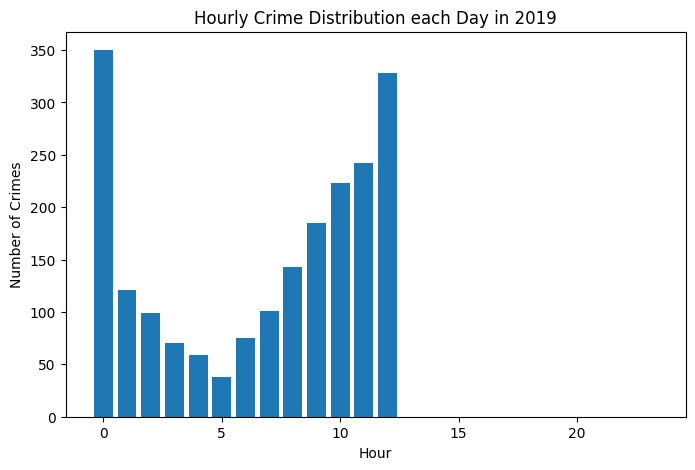

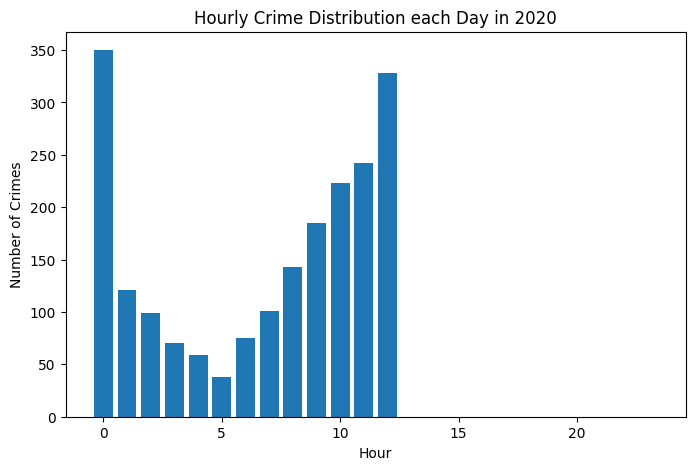

In [ ]:

def plotHourlyCrimeDistribution(data, title, w=800, h=500):
    hourly_counts = dataset['Hour'].value_counts().sort_index()
    hourly_counts = hourly_counts.reindex(range(24), fill_value=0)

    plt.figure(figsize=(w/100, h/100))
    plt.bar(hourly_counts.index, hourly_counts.values)
    plt.title(title)
    plt.xlabel('Hour')
    plt.ylabel('Number of Crimes')
    return plt

years_to_plot = [2016, 2017, 2018, 2019, 2020]
figs = []
for year in years_to_plot:
    year_data = dataset[dataset['Year'] == year]
    title = f'Hourly Crime Distribution each Day in {year}'
    fig = plotHourlyCrimeDistribution(year_data, title)
    figs.append(fig)
for fig in figs:
    fig.show()


In [ ]:
figs = []
for year in [2016,2017,2018,2019,2020]:
    figs.append(plotWeek(dataset[dataset['Year']==year], str('Hourly Crime Distribution each Day in '+str(year)),w=800,h=500))
for f in figs:
    f.show()

In [ ]:

total_week = [0] * 24  # Initialize with zeros for 24 hours
import random

week_hr = [[random.randint(0, 10) for _ in range(24)] for _ in range(7)]

for day_hr in week_hr:
    total_week = [total_week[i] + day_hr[i] for i in range(24)]

# Create a DataFrame to use with Plotly Express
hourly_data = pd.DataFrame({'Hour': range(24), 'Number of Crimes': total_week})

# Create a bar chart using Plotly Express
fig = px.bar(hourly_data, x='Hour', y='Number of Crimes',
             title='Total Hourly Crime Per Week',
             labels={'Hour': 'Hour', 'Number of Crimes': 'Number of Crimes'},
             color='Hour')

# Update the appearance of the chart
fig.update_xaxes(title_text='Hour')
fig.update_yaxes(title_text='Number of Crimes')
fig.update_layout(showlegend=False, coloraxis_showscale=False)

# Show the chart
fig.show()


Analysis based on crime type

In [ ]:
crime_categories = [dataset[dataset['Crime Name1']==list(dataset['Crime Name1'].unique())[i]] for i in range(5)]
fig = px.bar(dataset['Crime Name1'].value_counts(),title='Distribution of Crime Type',color=dataset['Crime Name1'].value_counts().index)
fig.update_xaxes(title_text='Crime Name')
fig.update_yaxes(title_text='Count')
fig.update_layout(showlegend=False)

#Analysis of each crime on each day of the week

In [ ]:
plotWeek(crime_categories[0],'Crime Against Property',w=1000,h=500).show()


In [ ]:
plotWeek(crime_categories[1],'Crime Against Person',w=1000,h=500).show()


In [ ]:
plotWeek(crime_categories[2],'Crime Against Society',w=1000,h=500).show()


In [ ]:
plotWeek(crime_categories[3],'Other Crimes',w=1000,h=500).show()


In [ ]:
plotWeek(crime_categories[4],'Non Crimes',w=1000,h=500).show()


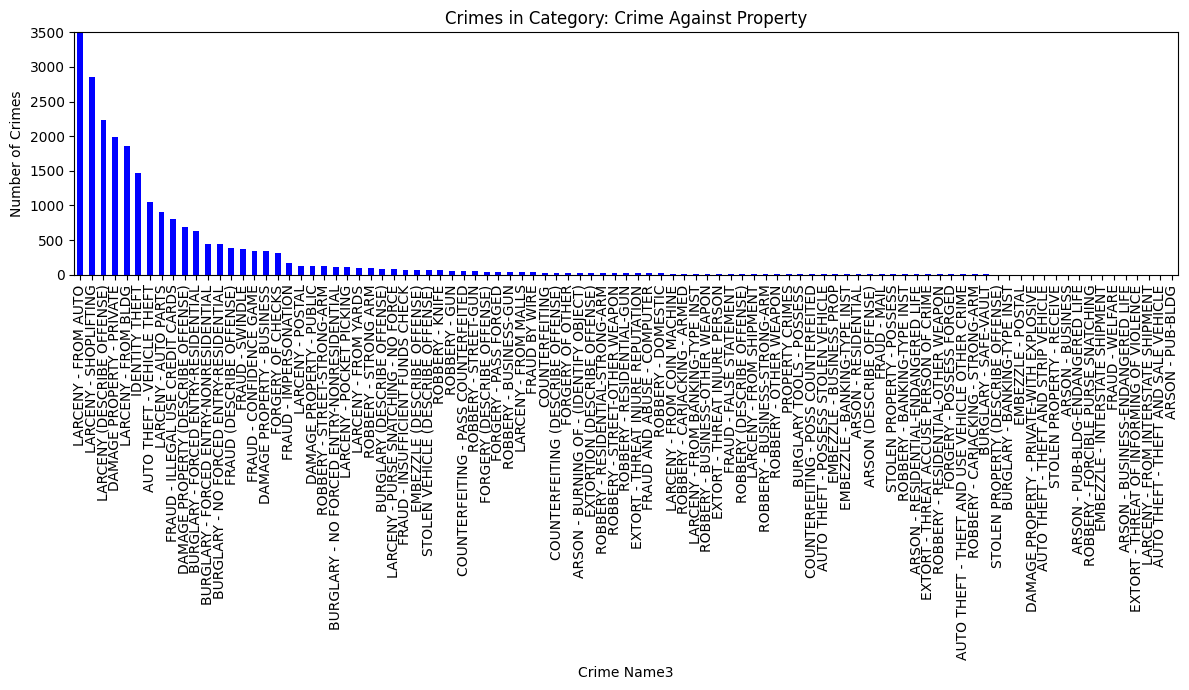

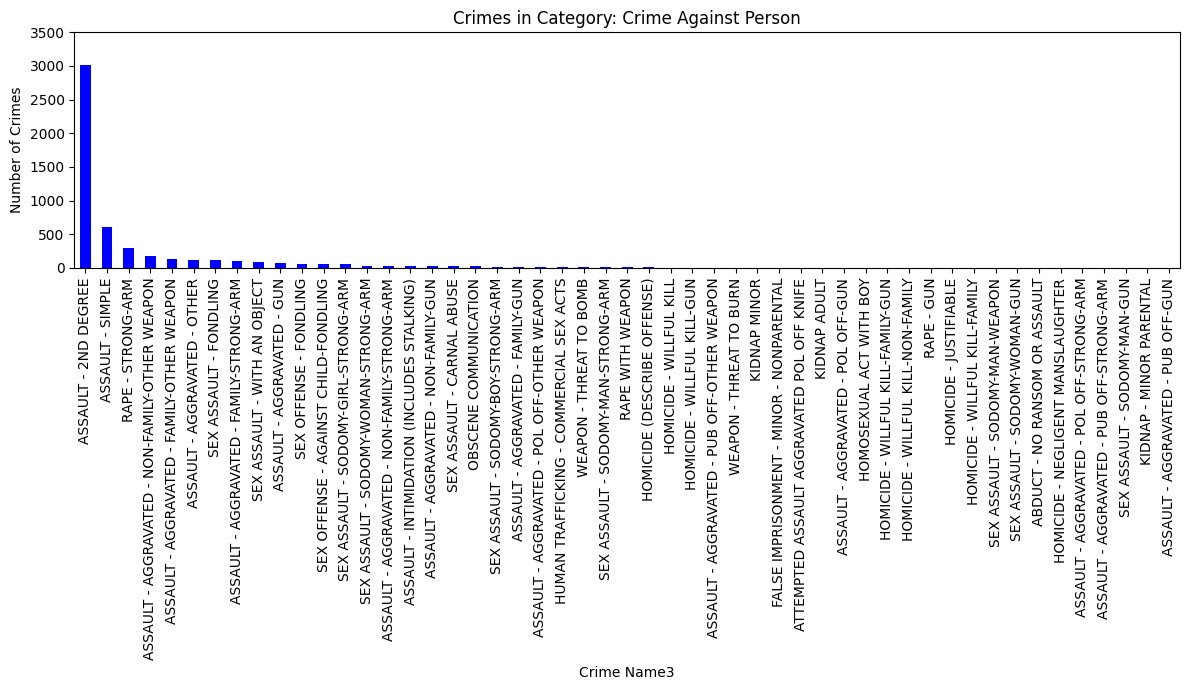

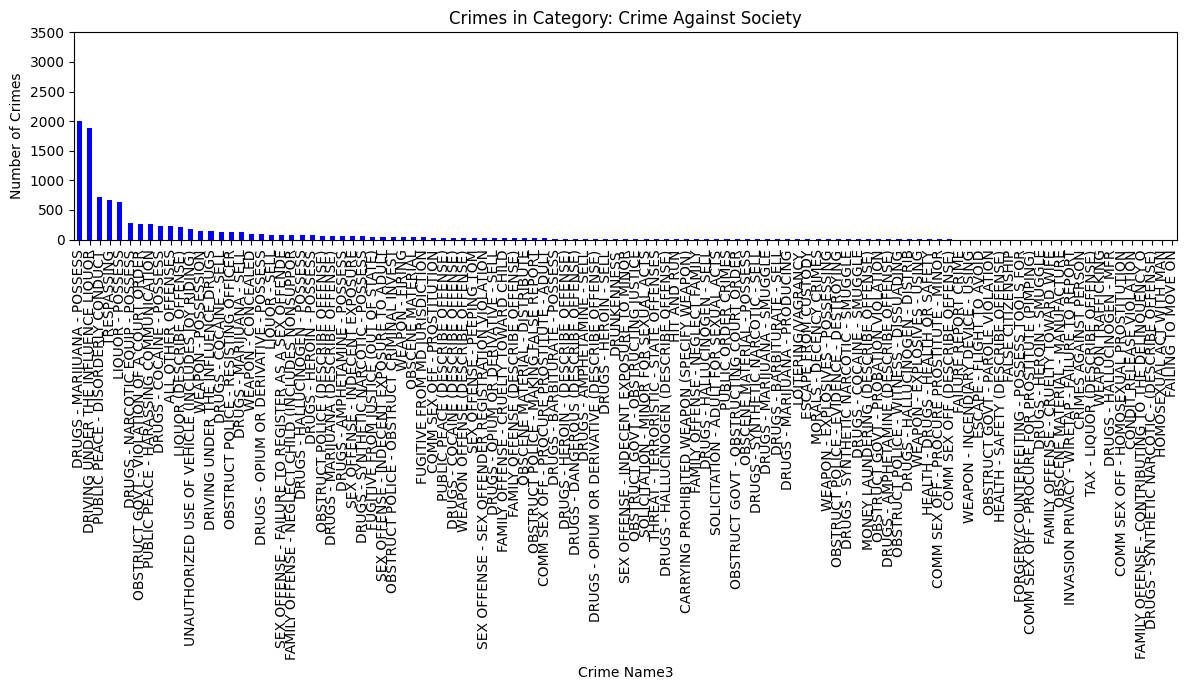

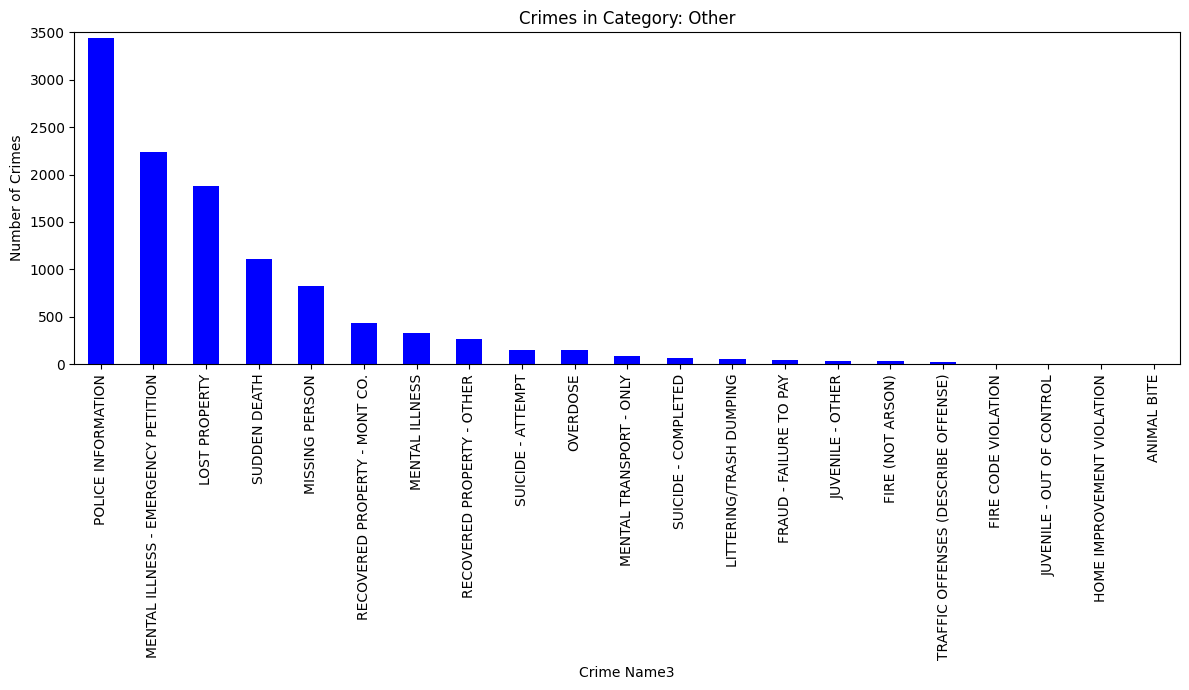

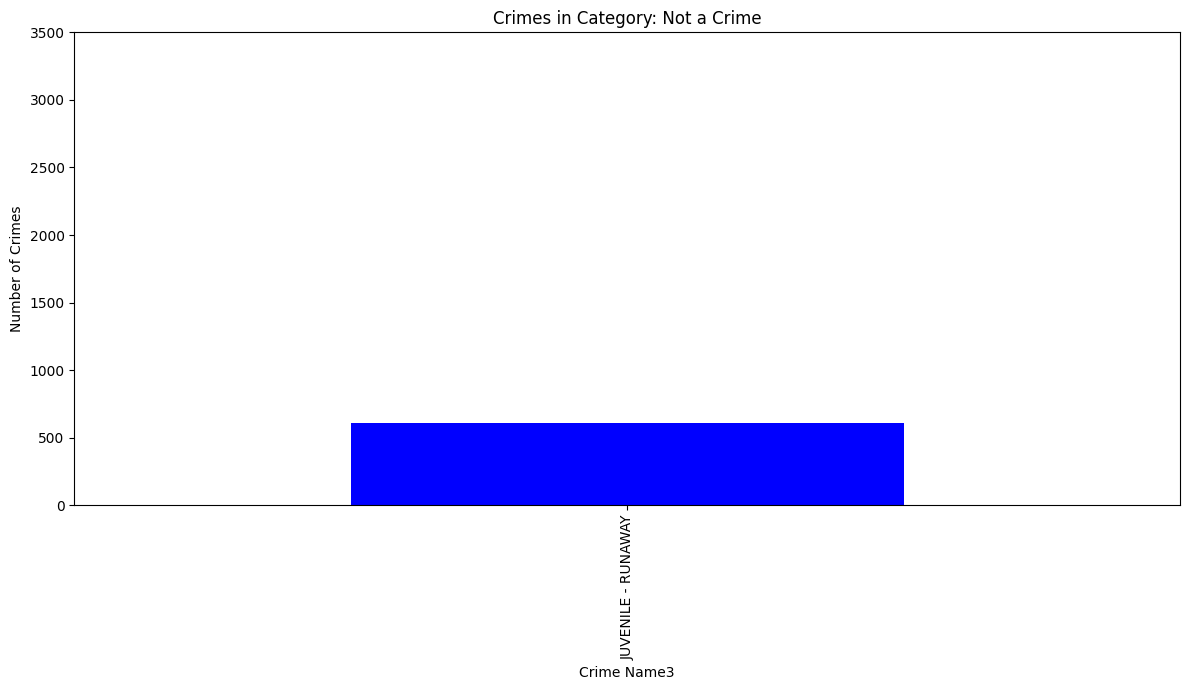

In [ ]:
import matplotlib.pyplot as plt

# Filter data for different categories
categories = ['Crime Against Property', 'Crime Against Person', 'Crime Against Society', 'Other', 'Not a Crime']

for category in categories:   # Create separate bar charts for each category
    category_data = dataset['Crime Name3'][dataset['Crime Name1'] == category]

    plt.figure(figsize=(12, 7))
    category_data.value_counts().plot.bar(title=f'Crimes in Category: {category}', color='blue')


    plt.xlabel('Crime Name3', fontsize=10)
    plt.ylabel('Number of Crimes', fontsize=10)
    plt.title(f'Crimes in Category: {category}', fontsize=12)
    plt.ylim(0, 3500)
    plt.tight_layout()
    plt.show()


In [ ]:
def treemap(categories,title,path,values):
    fig = px.treemap(categories, path=path, values=values, height=700,width=800,
                 title=title, color_discrete_sequence = px.colors.sequential.Jet)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
Number_crimes = dataset['Crime Name3'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index, columns=["Crime Name3"])
categories['values'] = values
fig = treemap(categories,'Crimes ',['Crime Name3'],categories['values'])

In [ ]:

labels = list(dataset['Crime Name1'].unique())
values = list(dataset['Crime Name1'].value_counts())
colors = ['DarkSlateBlue','FireBrick', 'LightPink', 'LightSkyBlue','MediumBlue']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)],)
fig.update_traces(title_text='Crimes by Type' ,hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

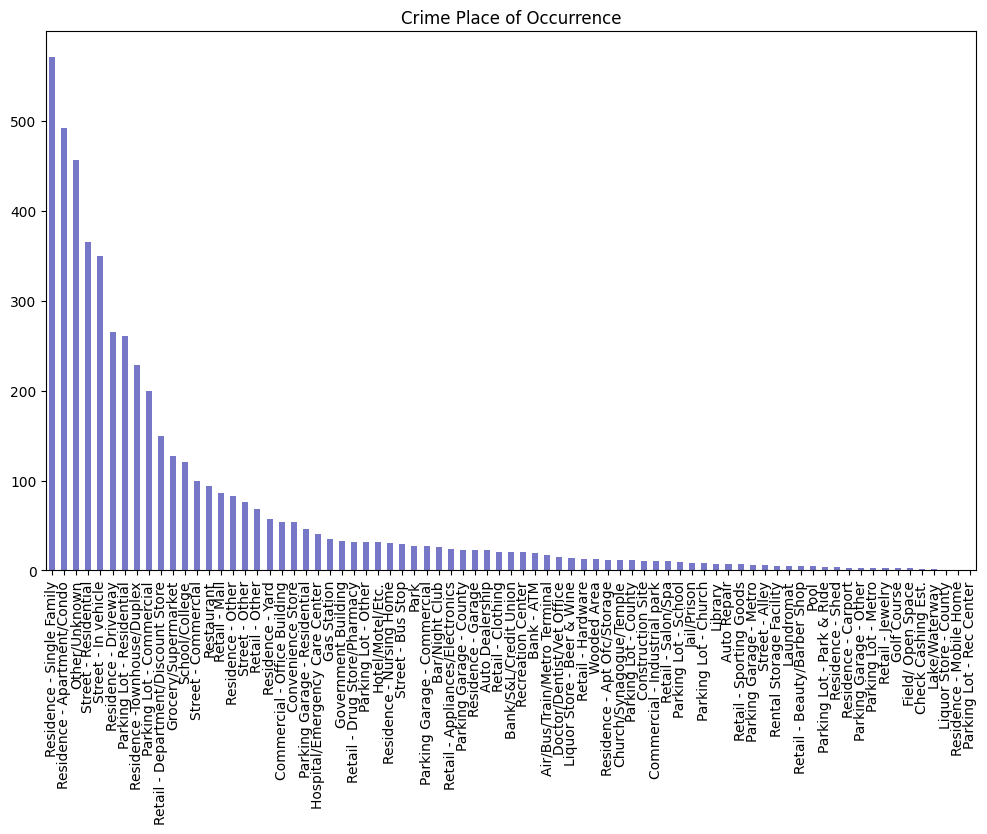

In [ ]:
plt.figure(figsize=(12, 7))

dataset['Place'].value_counts().plot.bar(title='Crime Place of Occurrence', color='#0098')

plt.show()

<Axes: title={'center': 'Crime in each Police District'}>

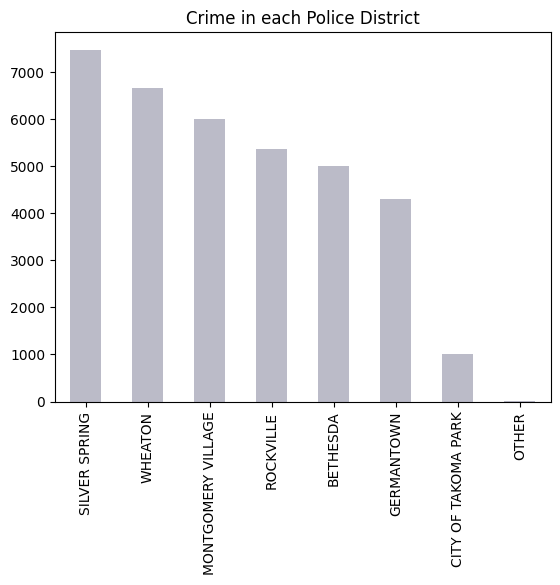

In [ ]:
dataset['Police District Name'].value_counts().plot.bar(color='#0034',title = 'Crime in each Police District')

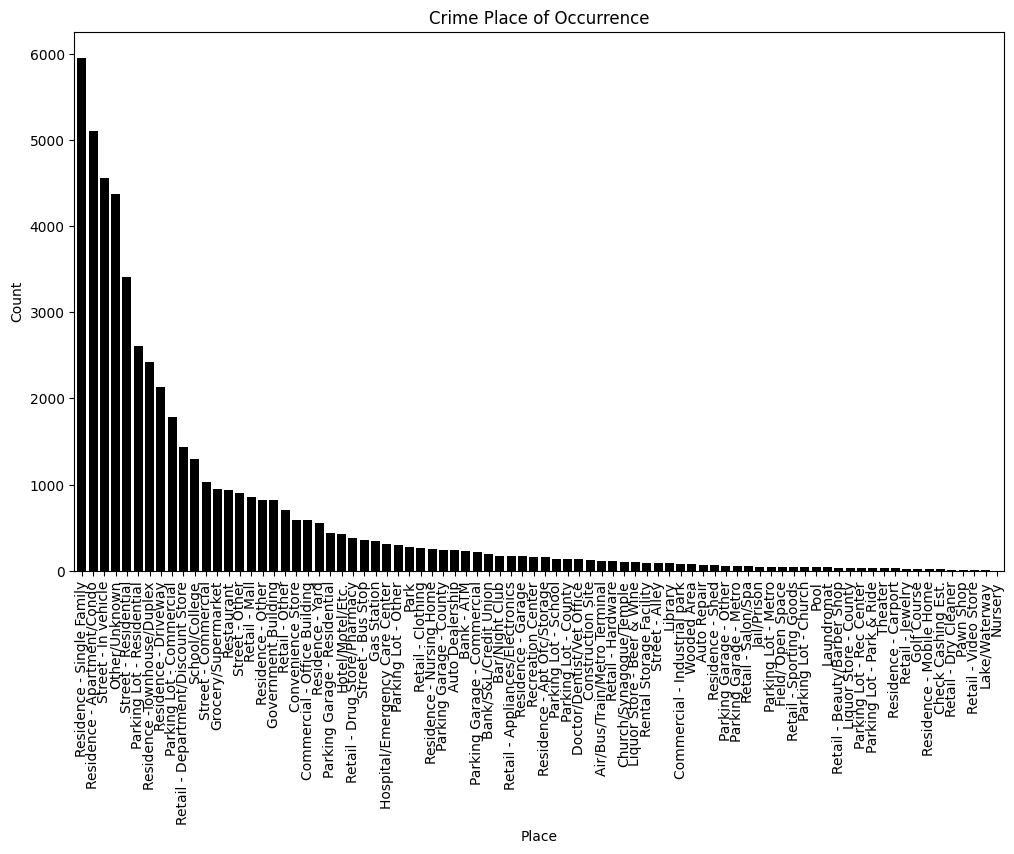

In [ ]:
plt.figure(figsize=(12, 7))
dataset['Place'].value_counts().plot.bar(title='Crime Place of Occurrence', color='black', width=0.8)
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#Conclusion
1.   In years, there isnt any specific patterns.
2.   During months and days , mostly its same.
3.   



